In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
# set the backgroud style of the plot
sns.set_style('darkgrid')

In [2]:
df = pd.read_excel('health.xlsx', index_col=0)

In [3]:
df = df.reset_index()

In [4]:
df = df.drop(columns=['Age'])


In [5]:
def conditions1(s):
    if (s['GAD7'] <= 5):
        return 'Normal'
    elif (s['GAD7']> 5 and s['GAD7'] <=15):
        return 'Mild to Moderate anxiety'
    elif (s['GAD7'] > 15):
        return 'Severe anxiety'

In [6]:
def conditions2(s):
    if (s['KDS6'] < 7):
        return 'Normal'
    elif(s['KDS6']>= 7):
        return 'Depression'

In [7]:
df['GAD7'] = df.apply(conditions1, axis=1)

In [8]:
df['KDS6'] = df.apply(conditions2, axis=1)

In [9]:
df =df.rename(columns={"GAD7": "Anxiety Level", "KDS6": "Depression Level"})

In [10]:
df.head(-5)

,Gender,new_online_edu_user,understanding_online,internet_problem,available_device_condition,worried_study,online_class_burden,teacher's attitude,avg_screen_edu,social_media,...,family_time,relation_with_parents,family_conflict,lost_family_member,friends_gap,financial_crisis,covid_safety,covid_knowledge,Anxiety Level,Depression Level
0,Female,Yes,Poor,Always,Satisfied,Moderate,No,Unsatisfactory,9+ hrs,4-6 hrs,...,Sometimes,Good,Sometimes,No,No,No,Sometimes,Good,Mild to Moderate anxiety,None
1,Male,Yes,Good,Sometimes,Satisfied,Moderate,No,Unsatisfactory,2-4 hrs,4-6 hrs,...,Very often,Excellent,Never,No,Yes,No,Sometimes,Good,Normal,None
2,Male,Yes,Poor,Always,Satisfied,Very Much,No,Very cooperative,5-8 hrs,1-3 hrs,...,Very often,Good,Never,No,Yes,Yes,Always,Good,Mild to Moderate anxiety,None
3,Male,Yes,Poor,Always,Satisfied,Very Much,No,Unsatisfactory,9+ hrs,1-3 hrs,...,Sometimes,Excellent,Sometimes,No,Yes,No,Always,Good,None,None
4,Male,Yes,Poor,Always,Satisfied,Very Much,No,Unsatisfactory,9+ hrs,1-3 hrs,...,Sometimes,Excellent,Sometimes,No,Yes,No,Always,Good,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Female,Yes,Good,Sometimes,Satisfied,Very Much,No,Very cooperative,5-8 hrs,1-3 hrs,...,Very often,Good,Very often,No,Yes,No,Sometimes,Good,Severe anxiety,Depression
133,Female,Yes,Excellent,Always,Not satisfied,Very Much,Yes,Very cooperative,9+ hrs,1-3 hrs,...,Sometimes,Good,Sometimes,No,Yes,Yes,Always,Good,Mild to Moderate anxiety,Normal
134,Female,Yes,Good,Sometimes,Satisfied,Very Much,No,Moderate,2-4 hrs,4-6 hrs,...,Sometimes,Excellent,Sometimes,No,Yes,No,Sometimes,Good,Mild to Moderate anxiety,Depression
135,Female,No,Poor,Sometimes,Satisfied,Very Much,No,Moderate,2-4 hrs,4-6 hrs,...,Sometimes,Good,Sometimes,No,Yes,No,Always,Good,Mild to Moderate anxiety,Depression


In [11]:
#grouped = df.groupby(["social_media", "KDS6"])

<AxesSubplot:xlabel='family_time', ylabel='count'>

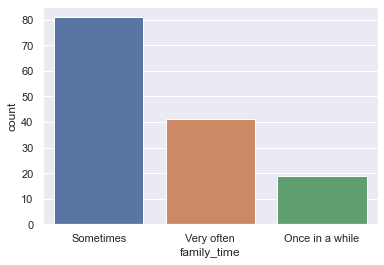

In [12]:

# plot the graph using the default estimator mean
sns.countplot(x='family_time',data =df) 

In [13]:
df = df.dropna(axis = 0, how ='any')

In [14]:
df =df.rename(columns={"covid_safety": "covid_safety_maintain", "avg_screen_edu": "avg_screentime_for_edu","sleep_cycle_hampar":"sleep_cycle_hamper"})

In [15]:
df.columns

Index(['Gender', 'new_online_edu_user', 'understanding_online',
       'internet_problem', 'available_device_condition', 'worried_study',
       'online_class_burden', 'teacher's attitude', 'avg_screentime_for_edu',
       'social_media', 'play_online_games', 'healthy diet',
       'sleep_cycle_hamper', 'sleep_hrs', 'excercise', 'family_time',
       'relation_with_parents', 'family_conflict', 'lost_family_member',
       'friends_gap', 'financial_crisis', 'covid_safety_maintain',
       'covid_knowledge', 'Anxiety Level', 'Depression Level'],
      dtype='object')

In [16]:
df['Anxiety Level'].isna().sum()

0

In [17]:
df = df.reset_index()

In [18]:
#df['GAD7'] = df['GAD7'].map({'No anxiety':1,'Mild anxiety':2,'Moderate anxiety':3,'Severe anxiety':4})

<AxesSubplot:xlabel='Anxiety Level'>

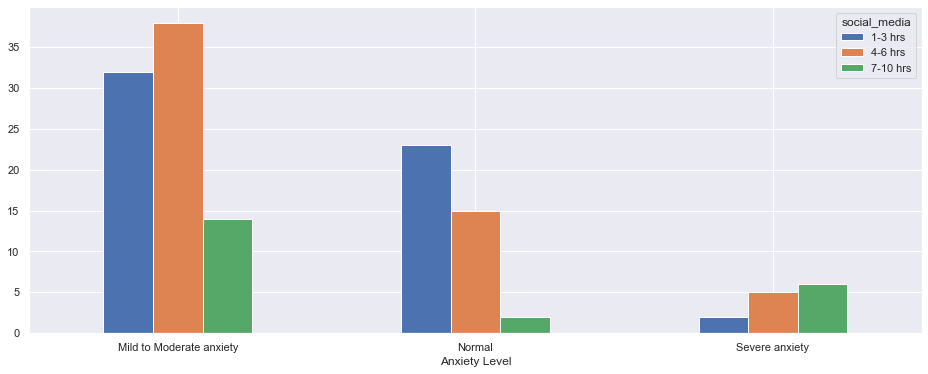

In [19]:
df.groupby(['Anxiety Level'])['social_media'].count()

CrosstabResult=pd.crosstab(index=df['Anxiety Level'],columns=df['social_media'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(16,6), rot=0)

<AxesSubplot:xlabel='Depression Level'>

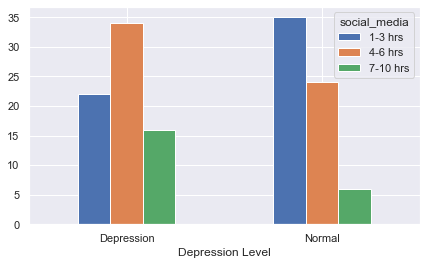

In [20]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns=df['social_media'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Anxiety Level'>

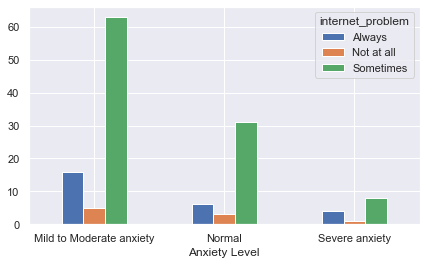

In [21]:
CrosstabResult=pd.crosstab(index=df['Anxiety Level'],columns=df['internet_problem'])
#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Depression Level'>

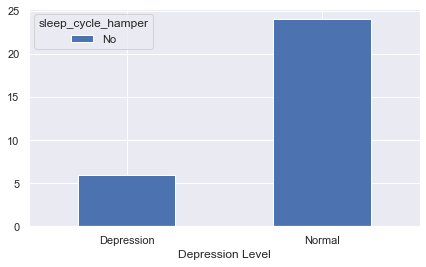

In [22]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns= df[df['sleep_cycle_hamper'] == 'No']['sleep_cycle_hamper'])

#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Depression Level'>

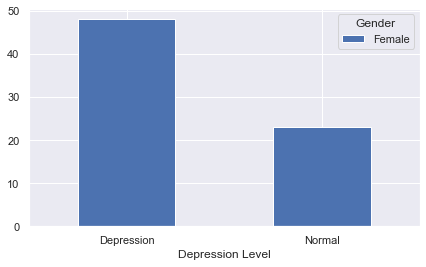

In [23]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns= df[df['Gender'] == 'Female']['Gender'])

#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Depression Level'>

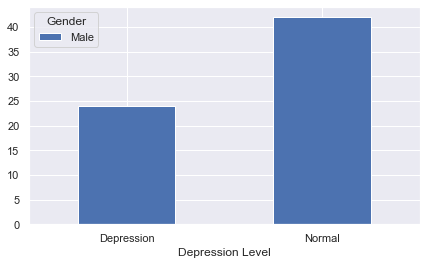

In [24]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns= df[df['Gender'] == 'Male']['Gender'])

#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Depression Level'>

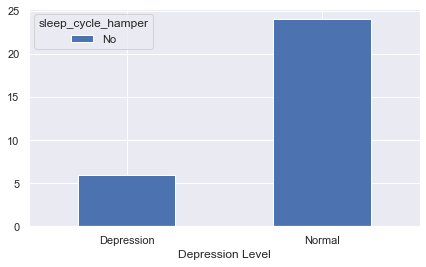

In [27]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns= df[df['sleep_cycle_hamper'] == 'No']['sleep_cycle_hamper'])

#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot:xlabel='Depression Level'>

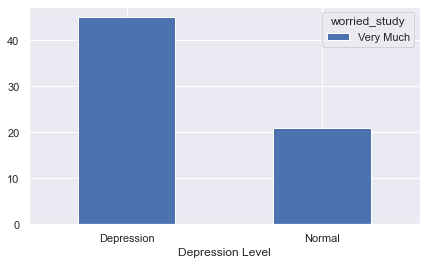

In [29]:

CrosstabResult=pd.crosstab(index=df['Depression Level'],columns= df[df['worried_study'] == 'Very Much']['worried_study'])

#print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

In [26]:

df[df['sleep_cycle_hamper'] == 'Yes']['sleep_cycle_hamper']


0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
130    Yes
131    Yes
134    Yes
135    Yes
136    Yes
Name: sleep_cycle_hamper, Length: 107, dtype: object

C:\Users\mohia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


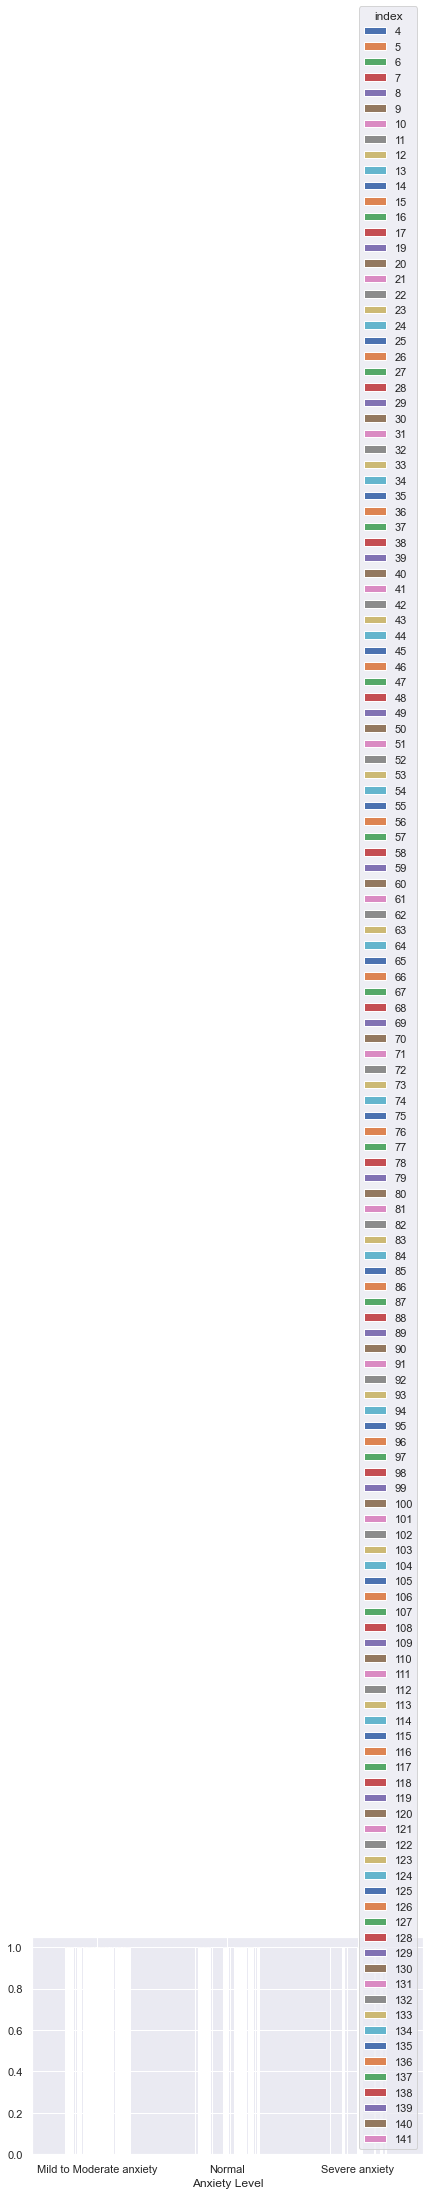

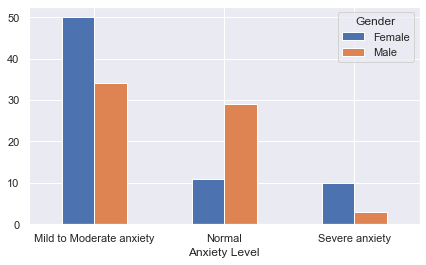

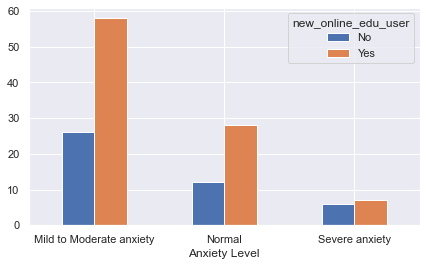

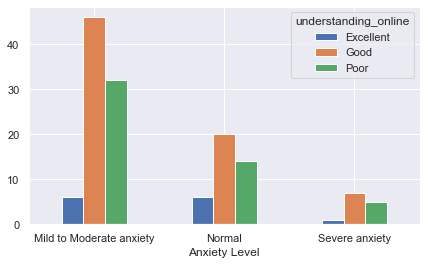

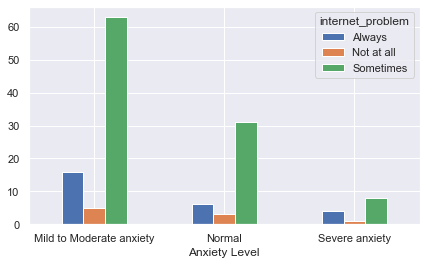

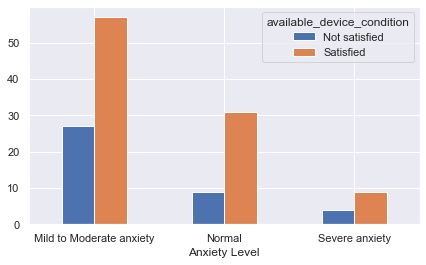

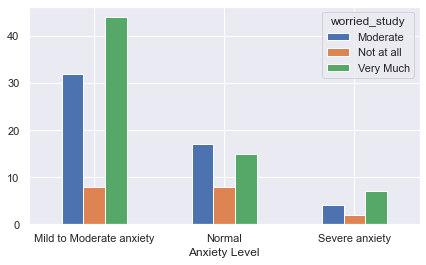

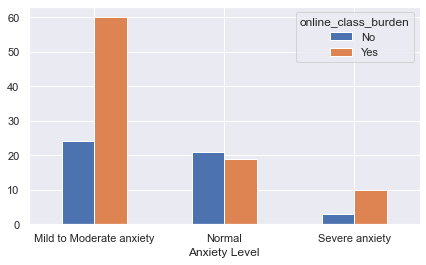

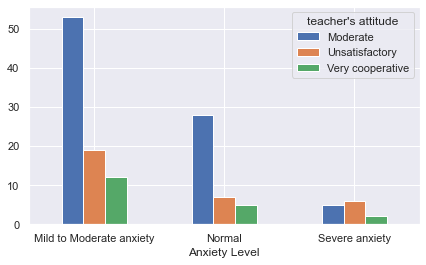

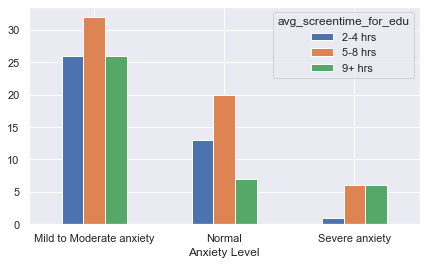

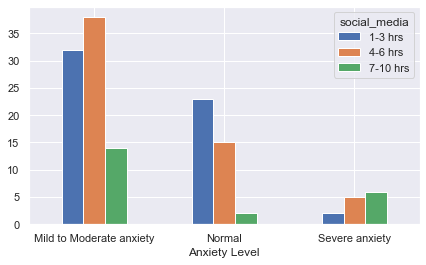

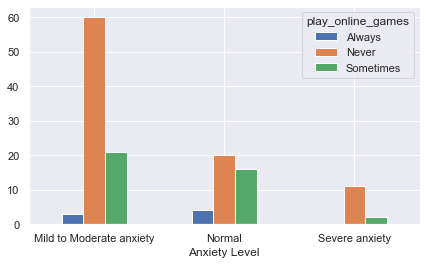

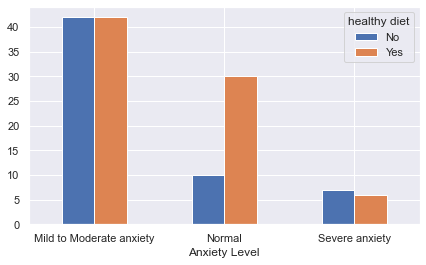

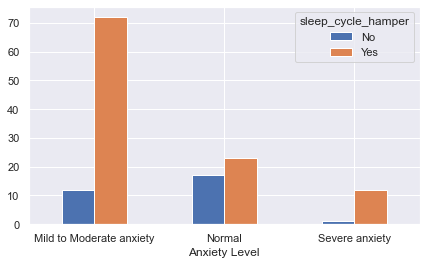

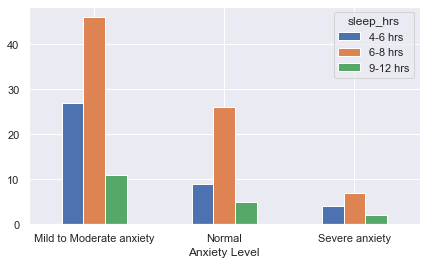

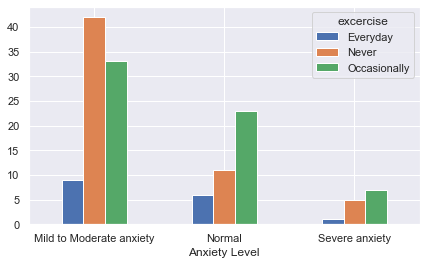

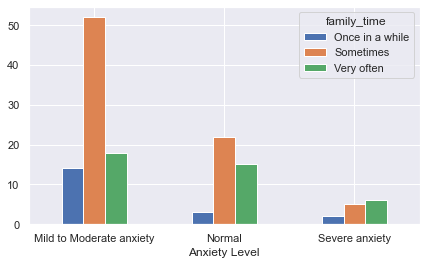

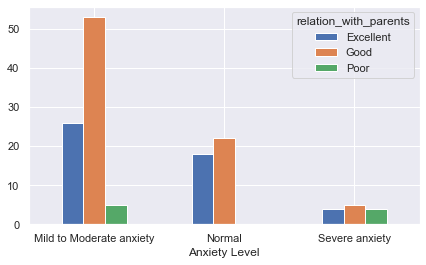

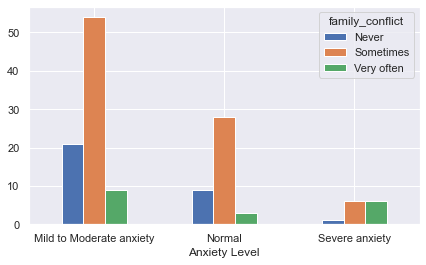

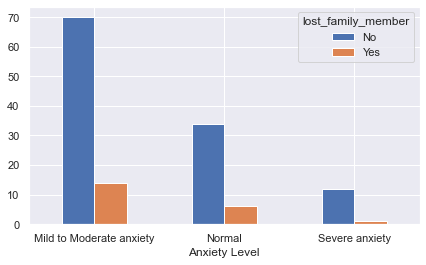

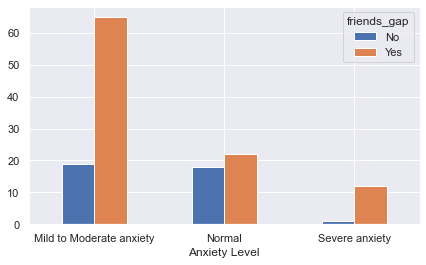

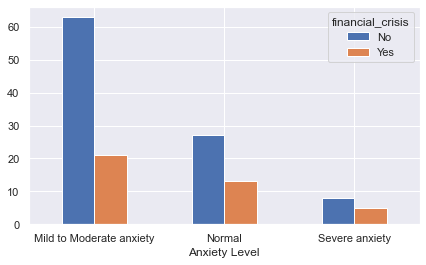

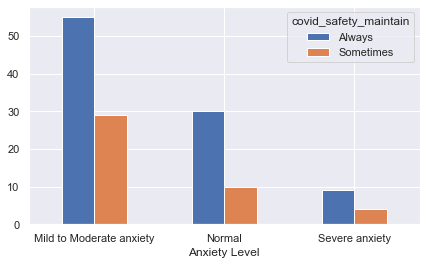

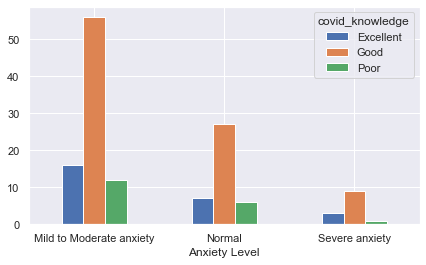

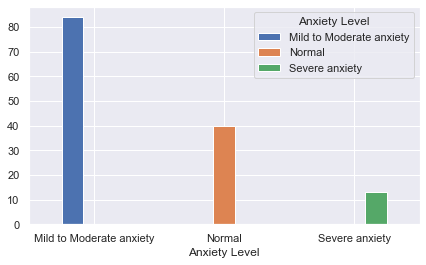

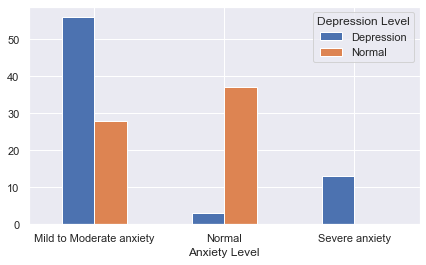

In [27]:
for i in df.columns:
    CrosstabResult=pd.crosstab(index=df['Anxiety Level'],columns=df[i])

    CrosstabResult.plot.bar(figsize=(7,4), rot=0)
    

C:\Users\mohia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


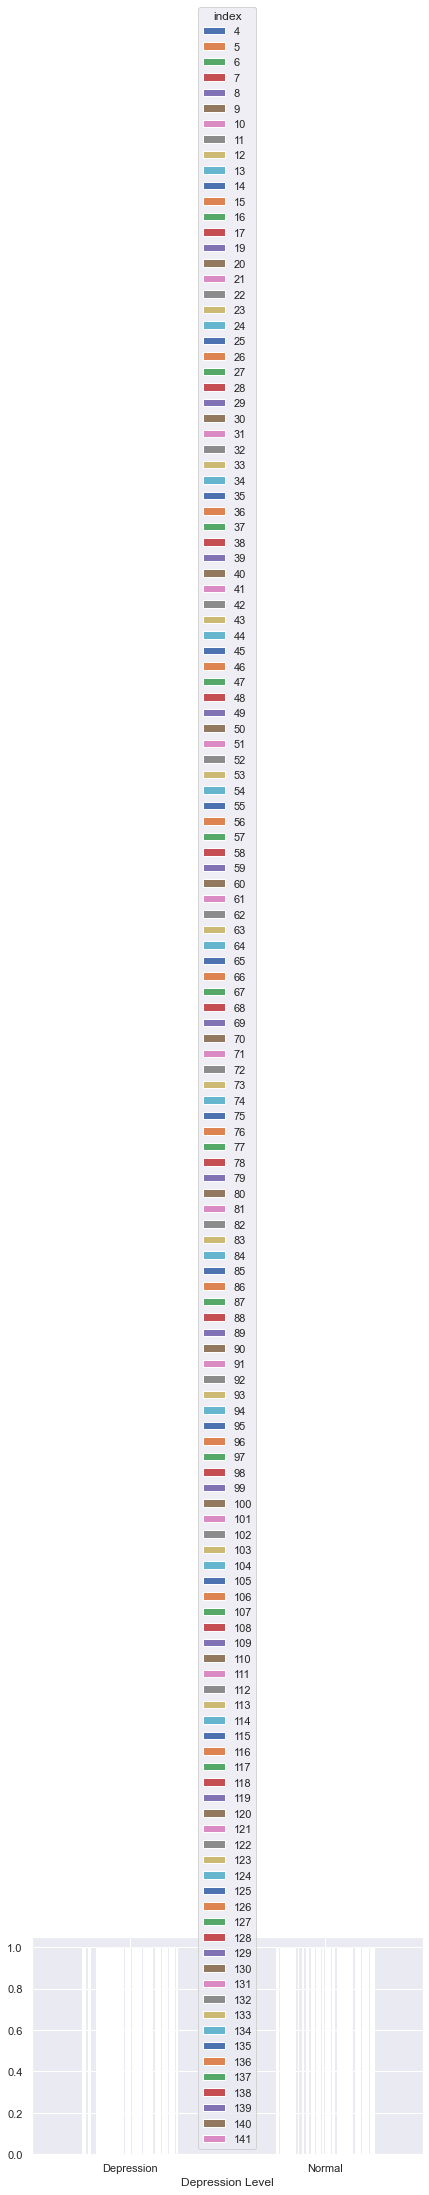

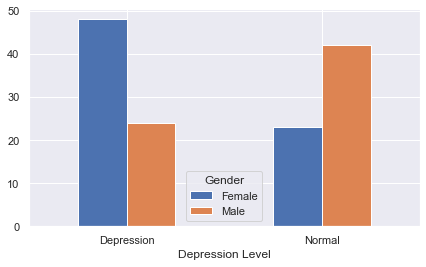

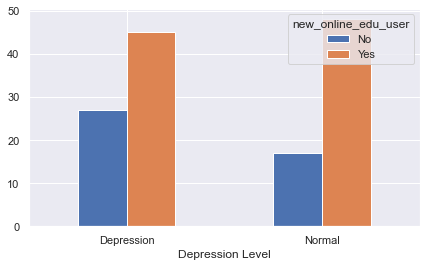

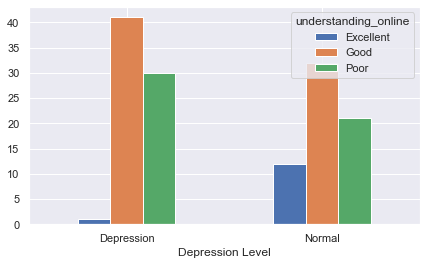

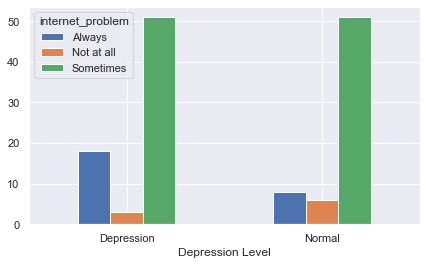

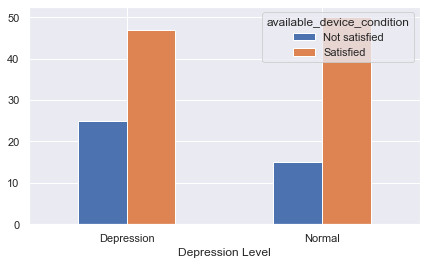

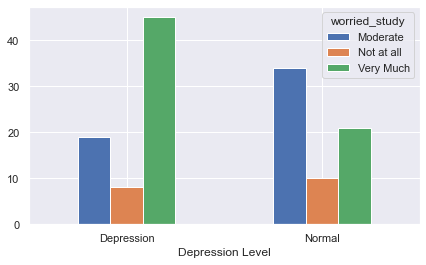

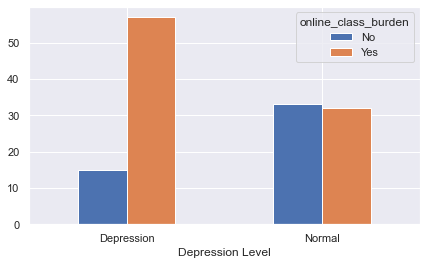

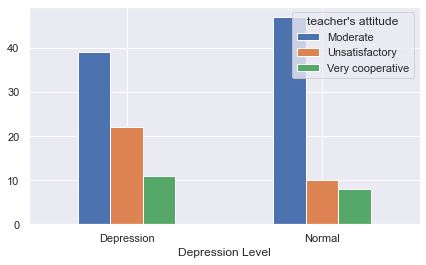

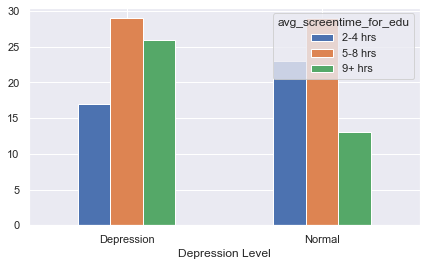

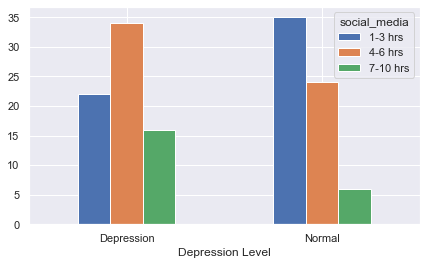

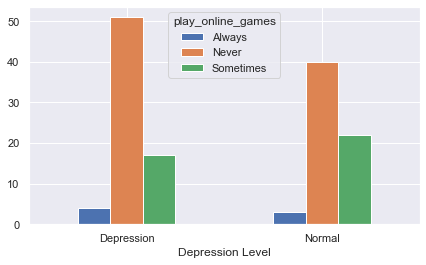

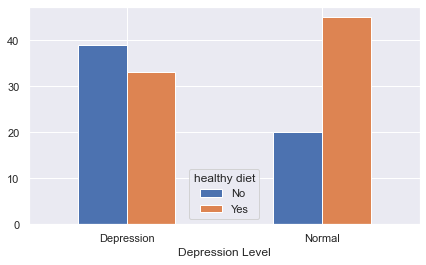

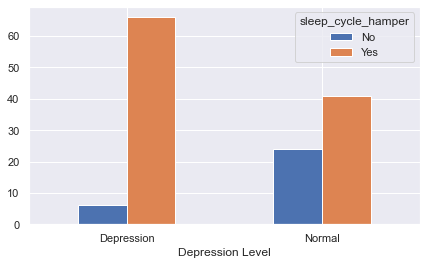

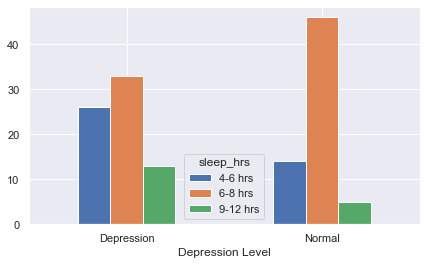

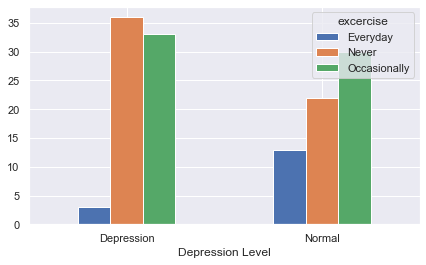

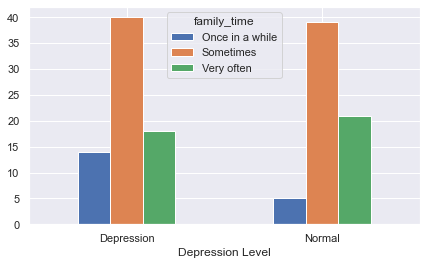

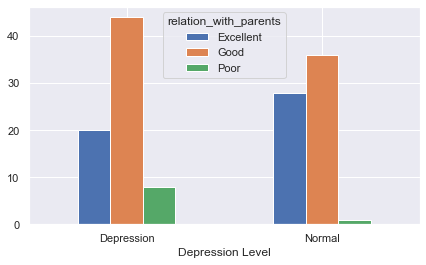

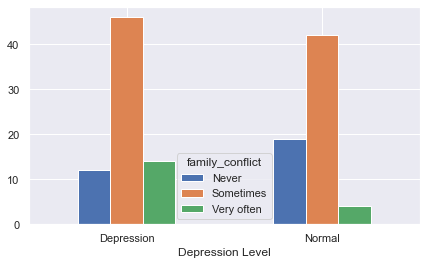

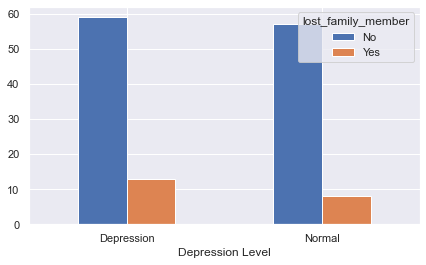

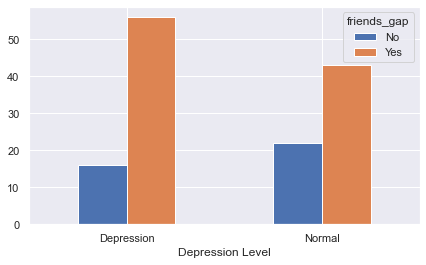

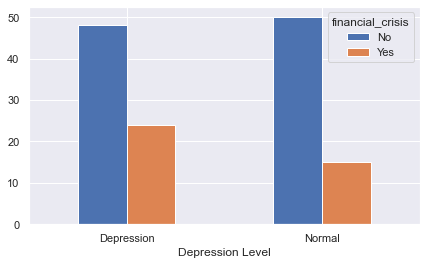

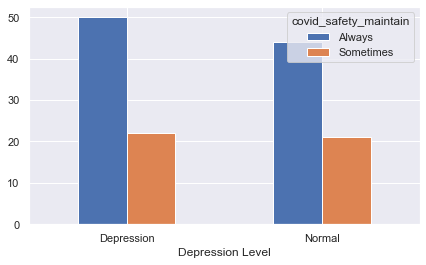

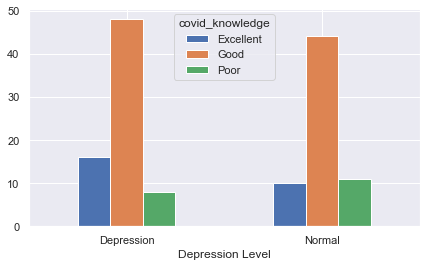

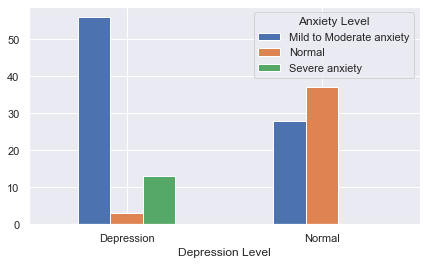

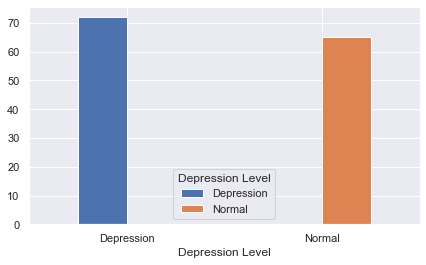

In [28]:
for i in df.columns:
    CrosstabResult=pd.crosstab(index=df['Depression Level'],columns=df[i])
#print(CrosstabResult)
    CrosstabResult.plot.bar(figsize=(7,4), rot=0)
    

In [29]:
df = df.drop(columns=['index'])

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))
for i in df.columns:
    plt.hist(df[i])
    print(df[i])
   # plt.bar([x for x in range(len(importance))], importance)
    plt.show()

NameError: name 'plt' is not defined

In [31]:
online_class_burden,

NameError: name 'online_class_burden' is not defined

In [ ]:
Gender,understanding online,worried about study,avg screen time edu,social media,healthy diet,sleep cycle hamper,excercise,covid safety maintains

In [ ]:
df.columns

In [ ]:
normalized_feature = ['Gender','understanding_online','worried_study', 'avg_screentime_for_edu','social_media', 'healthy diet','sleep_cycle_hamper', 'excercise','covid_safety_maintain']

In [ ]:
x = pd.get_dummies(df['Anxiety Level'])
x

In [32]:
df.columns

Index(['Gender', 'new_online_edu_user', 'understanding_online',
       'internet_problem', 'available_device_condition', 'worried_study',
       'online_class_burden', 'teacher's attitude', 'avg_screentime_for_edu',
       'social_media', 'play_online_games', 'healthy diet',
       'sleep_cycle_hamper', 'sleep_hrs', 'excercise', 'family_time',
       'relation_with_parents', 'family_conflict', 'lost_family_member',
       'friends_gap', 'financial_crisis', 'covid_safety_maintain',
       'covid_knowledge', 'Anxiety Level', 'Depression Level'],
      dtype='object')

In [33]:
df.head()

,Gender,new_online_edu_user,understanding_online,internet_problem,available_device_condition,worried_study,online_class_burden,teacher's attitude,avg_screentime_for_edu,social_media,...,family_time,relation_with_parents,family_conflict,lost_family_member,friends_gap,financial_crisis,covid_safety_maintain,covid_knowledge,Anxiety Level,Depression Level
0,Male,Yes,Poor,Always,Satisfied,Very Much,No,Unsatisfactory,9+ hrs,1-3 hrs,...,Sometimes,Excellent,Sometimes,No,Yes,No,Always,Good,Normal,Normal
1,Male,Yes,Poor,Sometimes,Not satisfied,Not at all,Yes,Moderate,5-8 hrs,4-6 hrs,...,Very often,Excellent,Sometimes,No,No,No,Always,Good,Mild to Moderate anxiety,Depression
2,Male,Yes,Good,Sometimes,Satisfied,Very Much,Yes,Moderate,2-4 hrs,1-3 hrs,...,Sometimes,Good,Sometimes,No,Yes,No,Always,Good,Mild to Moderate anxiety,Normal
3,Female,Yes,Good,Always,Not satisfied,Very Much,Yes,Unsatisfactory,9+ hrs,4-6 hrs,...,Sometimes,Good,Sometimes,Yes,Yes,No,Always,Excellent,Mild to Moderate anxiety,Depression
4,Female,Yes,Good,Always,Not satisfied,Very Much,Yes,Moderate,2-4 hrs,4-6 hrs,...,Sometimes,Good,Sometimes,Yes,Yes,No,Always,Excellent,Mild to Moderate anxiety,Depression


In [34]:
df1 = df.copy()


In [35]:
df1.columns

Index(['Gender', 'new_online_edu_user', 'understanding_online',
       'internet_problem', 'available_device_condition', 'worried_study',
       'online_class_burden', 'teacher's attitude', 'avg_screentime_for_edu',
       'social_media', 'play_online_games', 'healthy diet',
       'sleep_cycle_hamper', 'sleep_hrs', 'excercise', 'family_time',
       'relation_with_parents', 'family_conflict', 'lost_family_member',
       'friends_gap', 'financial_crisis', 'covid_safety_maintain',
       'covid_knowledge', 'Anxiety Level', 'Depression Level'],
      dtype='object')

In [36]:
pd.options.display.max_rows = 999

# Preprocessing categorical variable

### Gender 

In [37]:
dummies = pd.get_dummies(df1['Gender'])
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'Gender'])


### New online edu user

In [38]:
dummies = pd.get_dummies(df1['new_online_edu_user'])
dummies = dummies.rename(columns={'Yes': 'new to online edu platform '})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'new_online_edu_user'])


### Understanding ONline

In [39]:
dummies = pd.get_dummies(df1['understanding_online'])
dummies = dummies.rename(columns={'Good': 'understanding_online_good','Poor': 'understanding_online_poor' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'understanding_online'])


### internet problem

In [40]:
dummies = pd.get_dummies(df1['internet_problem'])
dummies = dummies.rename(columns={'Not at all': 'internet_problem_not_at_all','Sometimes': 'internet_problem_sometimes' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'internet_problem'])


### available device condition

In [41]:
dummies = pd.get_dummies(df1['available_device_condition'])
dummies = dummies.rename(columns={'Satisfied': 'device_condition_satisfied'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'available_device_condition'])


### worried study

In [42]:
dummies = pd.get_dummies(df1['worried_study'])
dummies = dummies.rename(columns={'Not at all': 'worried_study_not_at_all' ,'Very Much':'worried_study_very_much'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'worried_study'])


### online class burden

In [43]:
dummies = pd.get_dummies(df1['online_class_burden'])
dummies = dummies.rename(columns={'Yes': 'online class burden'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'online_class_burden'])


### teacher's attitude

In [44]:
dummies = pd.get_dummies(df1["teacher's attitude"])
dummies = dummies.rename(columns={'Unsatisfactory': 'teachers_attitude_unsatisfactory','Very cooperative':'teachers_attitude_very_cooperative' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],"teacher's attitude"])


### avg_screentime_for_edu'

In [45]:
dummies = pd.get_dummies(df1["avg_screentime_for_edu"])
dummies = dummies.rename(columns={'5-8 hrs': 'screentime_for_edu 5-8 hrs','9+ hrs':'screentime_for_edu_9+ hrs' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],"avg_screentime_for_edu"])


### social Media 

In [46]:
dummies = pd.get_dummies(df1["social_media"])
dummies = dummies.rename(columns={'4-6 hrs': 'social media 4-6 hrs','7-10 hrs':'social media 7-10 hrs' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],"social_media"])

### play online games

In [47]:
dummies = pd.get_dummies(df1['play_online_games'])
dummies = dummies.rename(columns={'Never': 'online games never','Sometimes':'online games sometimes' })
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'play_online_games'])

## healthy diet

In [48]:
dummies = pd.get_dummies(df1['healthy diet'])
dummies = dummies.rename(columns={'Yes': 'healthy_diet'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'healthy diet'])

### sleep cycle hamper

In [49]:
dummies = pd.get_dummies(df1['sleep_cycle_hamper'])
dummies = dummies.rename(columns={'Yes': 'sleep hamper'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'sleep_cycle_hamper'])

### sleep_hrs

In [50]:
dummies = pd.get_dummies(df1['sleep_hrs'])
dummies = dummies.rename(columns={'6-8 hrs': 'sleep hour 6-8 hrs','9-12 hrs': 'sleep hrs 9-12 hrs'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'sleep_hrs'])

### regular exercise

In [51]:
dummies = pd.get_dummies(df1['excercise'])
dummies = dummies.rename(columns={'Never': 'excercise never','Occasionally': 'excercise sometimes'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'excercise'])

### family_time

In [52]:
dummies = pd.get_dummies(df1['family_time'])
dummies = dummies.rename(columns={'Sometimes': 'spend family time sometimes','Very often': 'spend family time very often'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'family_time'])

### relation_with_parents

In [53]:
dummies = pd.get_dummies(df1['relation_with_parents'])
dummies = dummies.rename(columns={'Good': 'parents relation good','Poor': 'parents relation poor'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'relation_with_parents'])

### family_conflict

In [54]:
dummies = pd.get_dummies(df1['family_conflict'])
dummies = dummies.rename(columns={'Sometimes': 'family conflict sometimes','Very often': 'family conflict very often'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'family_conflict'])

### lost_family_member

In [55]:
dummies = pd.get_dummies(df1['lost_family_member'])
dummies = dummies.rename(columns={'Yes': 'lost family member'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'lost_family_member'])

### relation gap with friends

In [56]:
dummies = pd.get_dummies(df1['friends_gap'])
dummies = dummies.rename(columns={'Yes': 'friends relation gap'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'friends_gap'])

### financial_crisis

In [57]:
dummies = pd.get_dummies(df1['financial_crisis'])
dummies = dummies.rename(columns={'Yes': 'financial crisis'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'financial_crisis'])

### covid safety maintain

In [58]:
dummies = pd.get_dummies(df1['covid_safety_maintain'])
dummies = dummies.rename(columns={'Always': 'covid_safety maintain'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[1],'covid_safety_maintain'])

### covid Knowledge

In [59]:
dummies = pd.get_dummies(df1['covid_knowledge'])
dummies = dummies.rename(columns={'Good': 'covid_knowledge good','Poor':'covid_knowledge poor'})
df1 = pd.concat([df1,dummies],axis ='columns')
df1 =df1.drop(columns = [dummies.columns[0],'covid_knowledge'])

### save this data to new excel file

In [60]:

df1.to_excel("preprocessed_data.xlsx",index = False) 

In [61]:
df1.dtypes

Anxiety Level                         object
Depression Level                      object
Male                                   uint8
new to online edu platform             uint8
understanding_online_good              uint8
understanding_online_poor              uint8
internet_problem_not_at_all            uint8
internet_problem_sometimes             uint8
device_condition_satisfied             uint8
worried_study_not_at_all               uint8
worried_study_very_much                uint8
online class burden                    uint8
teachers_attitude_unsatisfactory       uint8
teachers_attitude_very_cooperative     uint8
screentime_for_edu 5-8 hrs             uint8
screentime_for_edu_9+ hrs              uint8
social media 4-6 hrs                   uint8
social media 7-10 hrs                  uint8
online games never                     uint8
online games sometimes                 uint8
healthy_diet                           uint8
sleep hamper                           uint8
sleep hour

In [62]:
#df1['Anxiety Level'] = df1['Anxiety Level'].map({'Severe anxiety':2,'Mild to Moderate anxiety':1, 'Normal':0})

In [63]:
#df1['Depression Level'] = df1['Depression Level'].map({'Depression':1 ,'Normal':0})

In [64]:
df1.shape

(137, 38)

In [65]:
df1.columns

Index(['Anxiety Level', 'Depression Level', 'Male',
       'new to online edu platform ', 'understanding_online_good',
       'understanding_online_poor', 'internet_problem_not_at_all',
       'internet_problem_sometimes', 'device_condition_satisfied',
       'worried_study_not_at_all', 'worried_study_very_much',
       'online class burden', 'teachers_attitude_unsatisfactory',
       'teachers_attitude_very_cooperative', 'screentime_for_edu 5-8 hrs',
       'screentime_for_edu_9+ hrs', 'social media 4-6 hrs',
       'social media 7-10 hrs', 'online games never', 'online games sometimes',
       'healthy_diet', 'sleep hamper', 'sleep hour 6-8 hrs',
       'sleep hrs 9-12 hrs', 'excercise never', 'excercise sometimes',
       'spend family time sometimes', 'spend family time very often',
       'parents relation good', 'parents relation poor',
       'family conflict sometimes', 'family conflict very often',
       'lost family member', 'friends relation gap', 'financial crisis',
      

In [66]:
normalized_feature = ['Male','understanding_online_good','worried_study_very_much', 'screentime_for_edu 5-8 hrs','social media 4-6 hrs', 'healthy diet','sleep hamper', 'excercise sometimes','covid_safety maintain']

In [67]:
df1

,Anxiety Level,Depression Level,Male,new to online edu platform,understanding_online_good,understanding_online_poor,internet_problem_not_at_all,internet_problem_sometimes,device_condition_satisfied,worried_study_not_at_all,...,parents relation good,parents relation poor,family conflict sometimes,family conflict very often,lost family member,friends relation gap,financial crisis,covid_safety maintain,covid_knowledge good,covid_knowledge poor
0,Normal,Normal,1,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
1,Mild to Moderate anxiety,Depression,1,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
2,Mild to Moderate anxiety,Normal,1,1,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0
3,Mild to Moderate anxiety,Depression,0,1,1,0,0,0,0,0,...,1,0,1,0,1,1,0,1,0,0
4,Mild to Moderate anxiety,Depression,0,1,1,0,0,0,0,0,...,1,0,1,0,1,1,0,1,0,0
5,Mild to Moderate anxiety,Depression,1,1,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0
6,Normal,Normal,1,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,Normal,Normal,1,1,0,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
8,Mild to Moderate anxiety,Normal,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
9,Normal,Normal,1,1,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,1,0


In [68]:
## Logistic Regression model

In [69]:
from sklearn.linear_model import LogisticRegression
lreg_model_depression = LogisticRegression()
lreg_model_anxiety = LogisticRegression()


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df1.drop(['Anxiety Level','Depression Level'] ,axis='columns')
y1 = df1['Depression Level']
y2 = df1['Anxiety Level']

In [72]:
X.columns

Index(['Male', 'new to online edu platform ', 'understanding_online_good',
       'understanding_online_poor', 'internet_problem_not_at_all',
       'internet_problem_sometimes', 'device_condition_satisfied',
       'worried_study_not_at_all', 'worried_study_very_much',
       'online class burden', 'teachers_attitude_unsatisfactory',
       'teachers_attitude_very_cooperative', 'screentime_for_edu 5-8 hrs',
       'screentime_for_edu_9+ hrs', 'social media 4-6 hrs',
       'social media 7-10 hrs', 'online games never', 'online games sometimes',
       'healthy_diet', 'sleep hamper', 'sleep hour 6-8 hrs',
       'sleep hrs 9-12 hrs', 'excercise never', 'excercise sometimes',
       'spend family time sometimes', 'spend family time very often',
       'parents relation good', 'parents relation poor',
       'family conflict sometimes', 'family conflict very often',
       'lost family member', 'friends relation gap', 'financial crisis',
       'covid_safety maintain', 'covid_knowledge g

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, y1, test_size=0.7, random_state=43)

In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y2, test_size=0.7, random_state=23)

In [75]:
lreg_model_depression.fit(X_train,y_train)

LogisticRegression()

In [76]:
lreg_model_depression.score(X_test,y_test)

0.6770833333333334

In [77]:
lreg_model_anxiety.fit(X_train2,y_train2)

LogisticRegression()

In [78]:
lreg_model_anxiety.score(X_test2,y_test2)

0.5625

In [79]:
df1['Anxiety Level'].value_counts()

Mild to Moderate anxiety    84
Normal                      40
Severe anxiety              13
Name: Anxiety Level, dtype: int64

### as severe anxiety is very low it should be merged with other for better performance

In [80]:
import matplotlib.pyplot as plt

In [86]:
importance = lreg_model_depression.coef_[0]
importance

array([ 0.87070351,  0.62033137, -0.0895136 , -0.37034663,  0.17684609,
        0.06511896,  0.26794187, -0.07286426, -0.28586707, -0.924984  ,
       -0.92769548,  0.06684687,  0.7184406 , -0.31411076, -0.02339217,
       -0.32544439, -0.15560555,  0.28793989,  1.27517202, -0.84265742,
        0.76755572, -0.12375964, -0.18375261, -0.15904593, -0.1168337 ,
       -0.07859508, -0.38818245, -0.03935681, -0.47479853,  0.01672286,
        0.0881475 , -0.499439  , -0.0355415 ,  0.13993529,  0.19721907,
        0.83725881])

In [82]:
def evaluate_metric(model, x_cv, y_cv):
    return f1_score(y_cv, model.predict(x_cv), average='micro')

In [89]:
# Input : Dataframe df with m features, number of required features n
# Output : Set of n features most useful for model performance

def forward_feature_selection(x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = [] # Choose appropriate metric based on business problem
        #model = RandomForestClassifier # You can choose any model you like, this technique is model agnostic
        model = RandomForestClassifier(n_estimators =24, random_state=28)
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True) # In case metric follows "the more, the merrier"
        feature_set.append(metric_list[0][1])
    return feature_set

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
forward_feature_selection(X_train, X_test, y_train, y_test, 10)

['worried_study_very_much',
 'financial crisis',
 'social media 7-10 hrs',
 'internet_problem_not_at_all',
 'spend family time very often',
 'teachers_attitude_unsatisfactory',
 'sleep hamper',
 'sleep hour 6-8 hrs',
 'understanding_online_poor',
 'spend family time sometimes']

In [90]:
importance = lreg_model_depression.coef_[0]
features_logistic_regression = []

# summarize feature importance
for i,v in enumerate(importance):
    
    #print(X.columns[i])
    if v >0.2:
        print('Feature: %0d, Score: %.5f' % (i,v))
        features.append(X.columns[i])
        print(X.columns[i])

        
        
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.87070


NameError: name 'features' is not defined

In [ ]:
features

In [91]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,50):
    for j in range(1,50):
        forest = RandomForestClassifier(n_estimators =i, random_state=j)
        forest.fit(X_train, y_train)
        if forest.score(X_test,y_test)> 0.66:
            print(forest.score(X_test,y_test))
            print(i,j)



0.6875
1 31
0.6770833333333334
2 10
0.6666666666666666
3 10
0.7083333333333334
3 25
0.6666666666666666
3 33
0.6666666666666666
3 46
0.6666666666666666
4 4
0.6875
4 10
0.6770833333333334
4 25
0.6875
4 27
0.6666666666666666
4 37
0.6875
4 46
0.6666666666666666
5 9
0.6979166666666666
5 10
0.7083333333333334
5 17
0.6875
5 25
0.6875
5 33
0.6770833333333334
5 40
0.6770833333333334
5 43
0.6666666666666666
5 46
0.6666666666666666
6 4
0.6875
6 9
0.6666666666666666
6 10
0.6770833333333334
6 22
0.6666666666666666
6 31
0.6875
6 33
0.6770833333333334
6 40
0.6979166666666666
6 43
0.6770833333333334
6 46
0.7083333333333334
7 10
0.6979166666666666
7 15
0.6770833333333334
7 21
0.6770833333333334
7 22
0.6666666666666666
7 24
0.6666666666666666
7 33
0.6666666666666666
7 42
0.6875
7 43
0.6666666666666666
7 46
0.7083333333333334
8 9
0.6770833333333334
8 10
0.6770833333333334
8 15
0.7083333333333334
8 19
0.6666666666666666
8 21
0.6666666666666666
8 22
0.6666666666666666
8 24
0.6770833333333334
8 25
0.6666666

0.6875
25 12
0.71875
25 15
0.6770833333333334
25 17
0.6770833333333334
25 21
0.6875
25 22
0.6770833333333334
25 24
0.7083333333333334
25 26
0.6666666666666666
25 27
0.6666666666666666
25 28
0.6770833333333334
25 29
0.6770833333333334
25 30
0.6666666666666666
25 31
0.6666666666666666
25 32
0.6770833333333334
25 33
0.6875
25 34
0.6666666666666666
25 35
0.6875
25 39
0.6979166666666666
25 40
0.6666666666666666
25 41
0.6875
25 42
0.7083333333333334
25 43
0.6770833333333334
25 44
0.6875
25 46
0.6875
25 47
0.6979166666666666
25 48
0.6666666666666666
25 49
0.6770833333333334
26 4
0.6875
26 5
0.6666666666666666
26 8
0.6770833333333334
26 9
0.75
26 10
0.6979166666666666
26 12
0.6770833333333334
26 16
0.6979166666666666
26 21
0.6666666666666666
26 25
0.6979166666666666
26 26
0.6666666666666666
26 27
0.6770833333333334
26 28
0.6875
26 29
0.6770833333333334
26 30
0.6666666666666666
26 31
0.6770833333333334
26 32
0.6979166666666666
26 33
0.6979166666666666
26 34
0.6666666666666666
26 37
0.6770833333

0.7083333333333334
36 26
0.7083333333333334
36 27
0.6979166666666666
36 28
0.6666666666666666
36 29
0.6875
36 30
0.6875
36 31
0.6666666666666666
36 32
0.6979166666666666
36 33
0.6979166666666666
36 34
0.6666666666666666
36 35
0.6666666666666666
36 36
0.6666666666666666
36 37
0.6875
36 38
0.7083333333333334
36 40
0.6979166666666666
36 41
0.6666666666666666
36 42
0.6979166666666666
36 43
0.6770833333333334
36 44
0.6666666666666666
36 45
0.6770833333333334
36 48
0.6770833333333334
36 49
0.6770833333333334
37 4
0.6875
37 5
0.6666666666666666
37 6
0.6666666666666666
37 7
0.6770833333333334
37 8
0.6666666666666666
37 9
0.7395833333333334
37 10
0.7083333333333334
37 11
0.7395833333333334
37 12
0.6666666666666666
37 16
0.6666666666666666
37 17
0.6979166666666666
37 18
0.6770833333333334
37 19
0.6875
37 20
0.6875
37 21
0.6875
37 22
0.6666666666666666
37 23
0.6979166666666666
37 24
0.6875
37 25
0.7083333333333334
37 26
0.6875
37 27
0.6770833333333334
37 29
0.6875
37 30
0.7083333333333334
37 31
0

0.7083333333333334
46 12
0.6666666666666666
46 14
0.6770833333333334
46 17
0.7083333333333334
46 18
0.6770833333333334
46 19
0.6770833333333334
46 20
0.6770833333333334
46 21
0.6979166666666666
46 22
0.7291666666666666
46 23
0.6770833333333334
46 24
0.6875
46 25
0.71875
46 26
0.7083333333333334
46 27
0.6875
46 28
0.7083333333333334
46 29
0.6666666666666666
46 30
0.6979166666666666
46 31
0.6875
46 32
0.6770833333333334
46 33
0.6979166666666666
46 35
0.6666666666666666
46 36
0.6979166666666666
46 37
0.6770833333333334
46 38
0.7083333333333334
46 40
0.71875
46 41
0.6666666666666666
46 42
0.6875
46 43
0.6979166666666666
46 45
0.6770833333333334
46 46
0.6770833333333334
46 47
0.71875
46 48
0.6875
47 2
0.6770833333333334
47 3
0.7083333333333334
47 4
0.6666666666666666
47 5
0.6875
47 6
0.6979166666666666
47 7
0.6770833333333334
47 8
0.6770833333333334
47 9
0.71875
47 10
0.6979166666666666
47 11
0.6979166666666666
47 12
0.6666666666666666
47 14
0.6979166666666666
47 17
0.6979166666666666
47 18

In [ ]:
forest.score(X_test,y_test)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots(figsize=(16, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

In [ ]:
index = 0 
important_features_random_forest = []
for i in forest_importances:
    if i > 0.01:
        print(X.columns[index])
        important_features_random_forest.append(X.columns[index])
        print(i)
    index+=1


In [ ]:
important_features_random_forest

In [ ]:

fig, ax = plt.subplots(figsize=(16, 10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# New model creation with important feature 

In [ ]:
new_X = df1. filter(features)

In [ ]:
y1

In [ ]:
new_X

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split( new_X, y2, test_size=0.7, random_state=43)

In [ ]:
from sklearn.linear_model import LogisticRegression
new_model = LogisticRegression()

In [ ]:
new_model.fit(new_X_train,new_y_train)

In [ ]:
new_model.score(new_X_test,new_y_test)

In [ ]:
important features = ['new to online edu platform','understanding_online_poor','device_condition_satisfied','teachers_attitude']

In [ ]:
y_pred = forest.predict(new_X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(new_y_test,y_pred))
print(classification_report(new_y_test, y_pred))
print(accuracy_score(new_y_test, y_pred))

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(new_X_train, new_y_train)

In [ ]:
clf.score(new_X_test,new_y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
clf_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(new_X_train,new_y_train)

#Predict the response for test dataset
y_pred = clf_tree.predict(new_X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(new_y_test, y_pred))

In [ ]:
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(new_X_train,new_y_train)

#Predict the response for test dataset
y_pred = clf_tree.predict(new_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(new_y_test, y_pred))

In [ ]:
from six import StringIO
 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['Mild to Moderate anxiety','Normal','Severe anxiety'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())